In [41]:
import numpy as np
import pandas as pd 

#En esta linea de codigo se importa la hoja "HECHOS" del dataset homicidios    
Hechos1 = pd.read_excel(r"D:\Users\Cesar\Desktop\Proyecto_individial_1\Siniestros_viales\Data_set\homicidios.xlsx", engine="openpyxl", sheet_name="HECHOS")

In [42]:
#En esta linea de codigo se guarda el dataframe en un archivo csv para mejorar la manipulacion y transformacion de los datos 
#ademas de facilitar la futura exportacion a otras sistemas de almacenamiento y analisis de datos 
Hechos1.to_csv("df_hechos.csv", index=False)

In [43]:
#En esta linea de codigo se lee e importa el archivo  dataframe creado y guardado en la carpeta EDA 
Hechos = pd.read_csv(r"D:\Users\Cesar\Desktop\Proyecto_individial_1\Siniestros_viales\EDA\df_hechos.csv")


In [44]:
Hechos.to_csv('Hechos.csv', index=False)

In [45]:
#En esta linea de codigo utilizamos la funcion info para observar los valores no nulos ademas del tipo de dato de cada 
#columna 
Hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [46]:
#En esta bloque de codigo vamos hacer transformaciones de tipo de datos segun el analisis para facilitar las consultas 
#y las visulizaciones 
#En la siguiente linea de codigo vamos a transformar columnas con tipo de datos "object" y "int" a "Category" 
categoricas = ['TIPO_DE_CALLE','PARTICIPANTES','VICTIMA','ACUSADO','COMUNA']
Hechos[categoricas] = Hechos[categoricas].astype('category')

In [47]:
# En esta linea de codigo se renombra las columnas 'pos x','pos y' y "ID "  a "longitud","latitud" Y ID_hecho para 
#facilitar la comprencion en las visualizaciones mas adelante, ademas de tener una columna en comun ID_hecho para uniones
Hechos = Hechos.rename(columns={'pos x': 'Longitud', 'pos y': 'Latitud','ID': 'ID_hecho'})

In [48]:
#En la siguiente linea de codigo vamos a transformar columnas con tipo de datos "object" a a tipo 'int' con manejo de errores 
enteros = ['HH']
for col in enteros:
    Hechos[col] = pd.to_numeric(Hechos[col], errors='coerce', downcast='integer').fillna(0).astype(int)

In [49]:
#Verificamos que los cambios se hayan relizado
Hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID_hecho               696 non-null    object  
 1   N_VICTIMAS             696 non-null    int64   
 2   FECHA                  696 non-null    object  
 3   AAAA                   696 non-null    int64   
 4   MM                     696 non-null    int64   
 5   DD                     696 non-null    int64   
 6   HORA                   696 non-null    object  
 7   HH                     696 non-null    int32   
 8   LUGAR_DEL_HECHO        696 non-null    object  
 9   TIPO_DE_CALLE          696 non-null    category
 10  Calle                  695 non-null    object  
 11  Altura                 129 non-null    float64 
 12  Cruce                  525 non-null    object  
 13  Dirección Normalizada  688 non-null    object  
 14  COMUNA                 696 non-null    cat

In [50]:
# En esta linea de codigo contamos cuantos valores nulos hay por columna para despues segun el analisis hacer
# imputaciones o eleiminaciones 
Hechos.isnull().sum()

ID_hecho                   0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
Longitud                   0
Latitud                    0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [51]:
# Debido a que hay muchos valores nulos en la columna "Altura" y no son indespensables para consultas y el problema que 
# se busca resolver se  elimina 
Hechos.drop('Altura', axis=1, inplace=True)


In [52]:
# En esta liena de codigo se modifica las columnas sin valor en la columna "Cruse","Calle","Direccion Normalizada"
columnas_a_modificar = ['Cruce', 'Calle', 'Dirección Normalizada']
Hechos[columnas_a_modificar] = Hechos[columnas_a_modificar].fillna("Sin información")
Hechos.to_csv('Hechos.csv', index=False)


In [53]:
# Se verifica que no tenga valores nulos ninguna columna 
Hechos.isnull().sum()

ID_hecho                 0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    0
Cruce                    0
Dirección Normalizada    0
COMUNA                   0
XY (CABA)                0
Longitud                 0
Latitud                  0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
dtype: int64

In [54]:
# En esta linea de codigo verificamos que los registros no esten repetidos y nos afecte las mediciones 
Hechos.duplicated(subset=['ID_hecho']).sum()

0

In [55]:
# En esta linea de codigo se realiza analisis de estadistica descriptiva de la Variables numericas 
Hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,HH
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,11.640805
std,0.179393,1.683754,3.571309,8.639646,6.709834
min,1.000000,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,6.000000
50%,1.000000,2018.000000,7.000000,16.000000,11.000000
75%,1.000000,2020.000000,10.000000,23.000000,17.250000
max,3.000000,2021.000000,12.000000,31.000000,23.000000


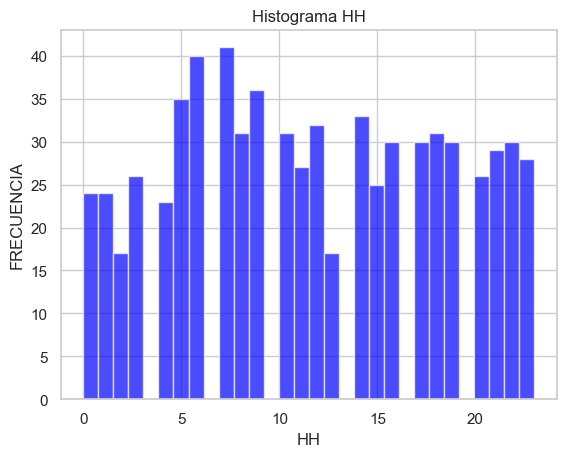

In [56]:
import matplotlib.pyplot as plt

#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable "HH"
# ya que es una variable cuantitativa 

plt.hist(Hechos['HH'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma HH')
plt.xlabel('HH')
plt.ylabel('FRECUENCIA')
plt.show()


"En este gráfico, se analizó la variable cuantitativa de la hora (HH). Se observa que sigue una distribución normal, en promedio, se mantiene constante a lo largo de todas las horas del día, con algunos picos notables entre las 5 y las 9 de la mañana. Sin embargo, estos picos no afectan significativamente la distribución general. La idea inicial era crear clases para mañana, tarde, noche y madrugada, con el objetivo de eliminar las horas menos relevantes. Sin embargo, dado que la distribución es bastante uniforme a lo largo del día, se decide mantener la variable sin modificaciones.

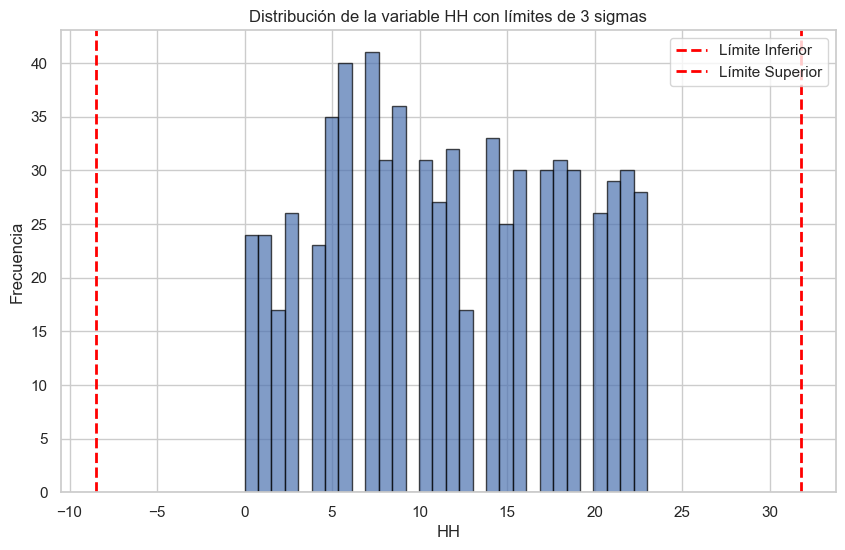

In [59]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar
media_hh = Hechos['HH'].mean()
std_hh = Hechos['HH'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Hechos[(Hechos['HH'] < limite_inferior) | (Hechos['HH'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Hechos['HH'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable HH con límites de 3 sigmas')
plt.xlabel('HH')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


En el gráfico anterior, observamos que no hay valores atípicos presentes, lo que significa que no se eliminó ningún valor de la columna.

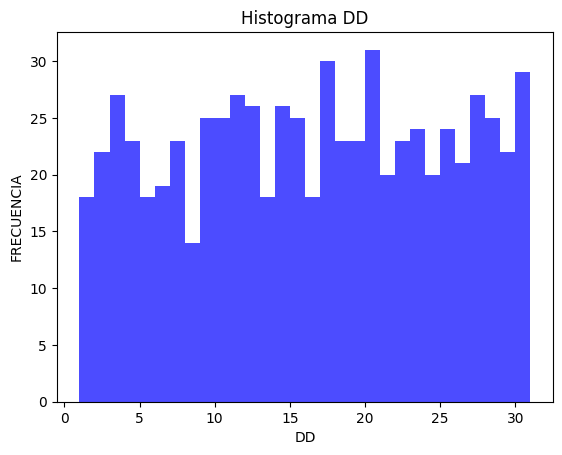

In [18]:
import matplotlib.pyplot as plt

#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable "DD"
# ya que es una variable cuantitativa 

plt.hist(Hechos['DD'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma DD')
plt.xlabel('DD')
plt.ylabel('FRECUENCIA')
plt.show()


En este histograma, podemos notar que la variable cuantitativa 'DD', que representa el día del siniestro, sigue una distribución uniforme. No se observa un incremento significativo en los siniestros para ningún día o días específicos.

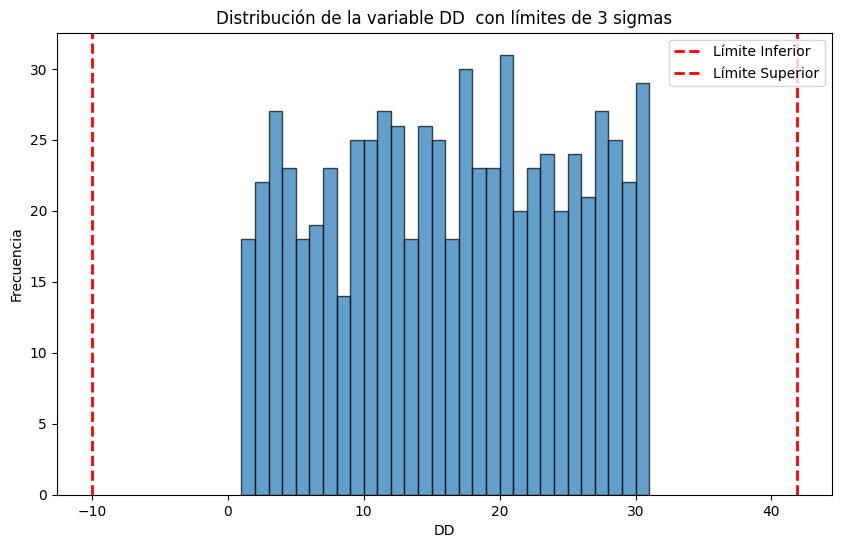

In [19]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar de "DD" qu nos representan los dias en fecha como tambien 
# Establecer límites para identificar valores atípicos

media_hh = Hechos['DD'].mean()
std_hh = Hechos['DD'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Hechos[(Hechos['DD'] < limite_inferior) | (Hechos['DD'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Hechos['DD'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable DD  con límites de 3 sigmas')
plt.xlabel('DD')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


En el gráfico, podemos observar que no existen valores atípicos en la variable cuantitativa 'días', representada en la columna 'DD'.

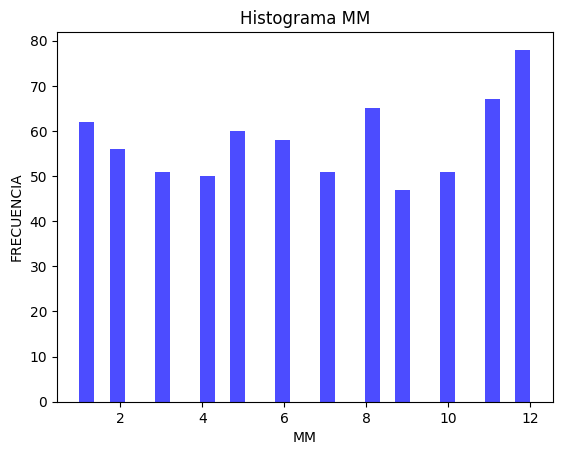

In [20]:
import matplotlib.pyplot as plt

#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable "MM"
# ya que es una variable cuantitativa 

plt.hist(Hechos['MM'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma MM')
plt.xlabel('MM')
plt.ylabel('FRECUENCIA')
plt.show()


Podemos observar que la distribución en el histograma de la variable cuantitativa 'MM' (que representa el mes) es uniforme, con un ligero incremento hacia el mes de diciembre, al final del año, y también al inicio del mismo. Aunque estos incrementos no son muy representativos en comparación con el promedio, podrían ser útiles para análisis posteriores en el contexto del problema a resolver

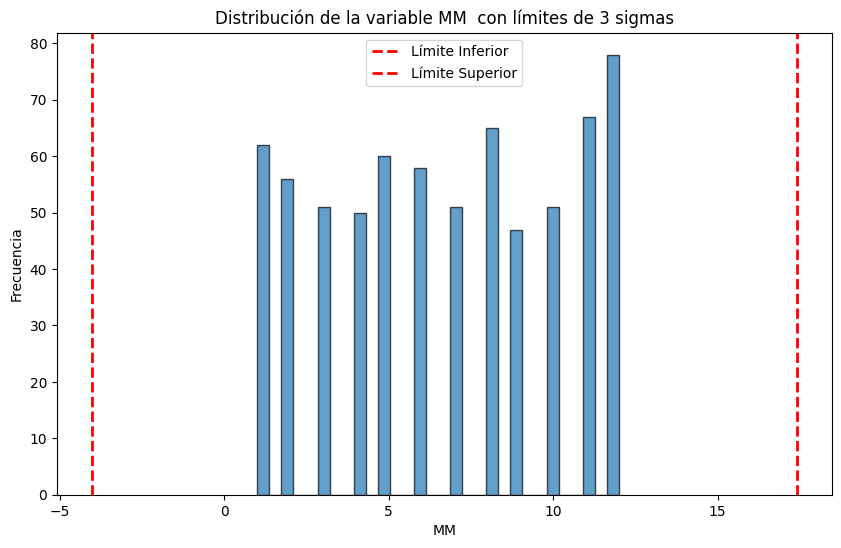

In [21]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar de "MM" qu nos representan los meses en fecha como tambien 
# Establecer límites para identificar valores atípicos

media_hh = Hechos['MM'].mean()
std_hh = Hechos['MM'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Hechos[(Hechos['MM'] < limite_inferior) | (Hechos['MM'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Hechos['MM'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable MM  con límites de 3 sigmas')
plt.xlabel('MM')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


Después de aplicar la regla de las tres sigmas para identificar valores atípicos y observar el gráfico, notamos que no hay presencia de tales valores, por lo que no es necesario eliminar datos 

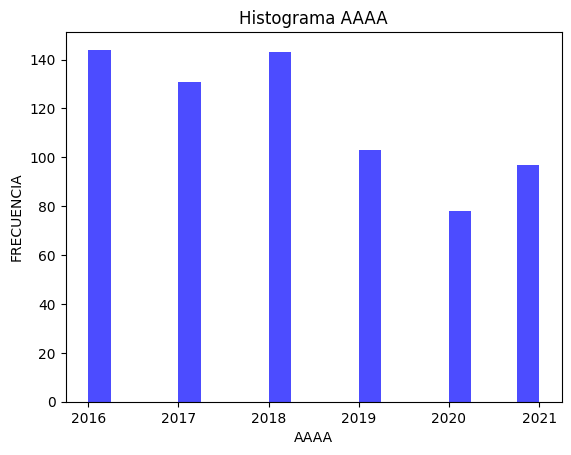

In [22]:
import matplotlib.pyplot as plt

#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable "AAAA"
# ya que es una variable cuantitativa 

plt.hist(Hechos['AAAA'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma AAAA')
plt.xlabel('AAAA')
plt.ylabel('FRECUENCIA')
plt.show()


Observamos una distribución con tendencia a la baja desde el año 2016, con un pequeño incremento después del 2021, pero en general, se observa una disminución en la cantidad de siniestros año tras año desde 2016, según la variable 'AAAA' que representa el año. Esta observación proporciona información valiosa para análisis posteriores.

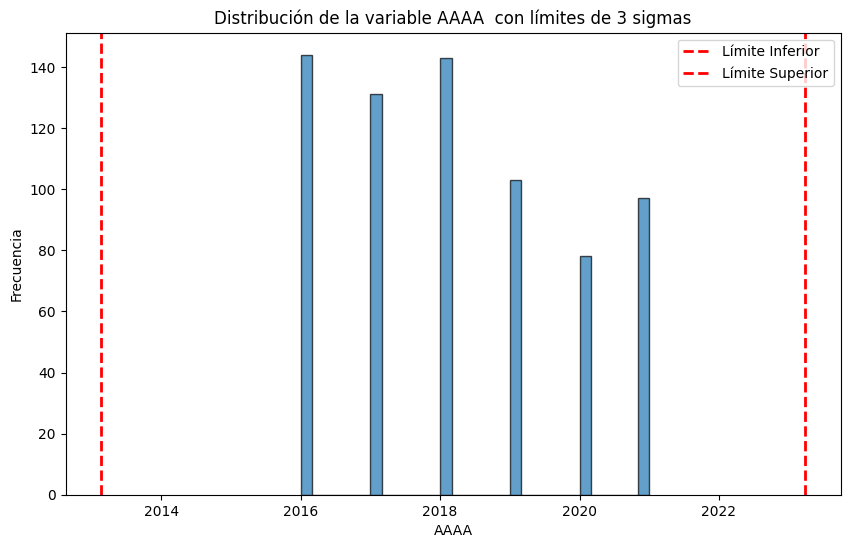

In [23]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar de "AAAA" qu nos representan los años en fecha como tambien 
# Establecer límites para identificar valores atípicos

media_hh = Hechos['AAAA'].mean()
std_hh = Hechos['AAAA'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Hechos[(Hechos['AAAA'] < limite_inferior) | (Hechos['AAAA'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Hechos['AAAA'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable AAAA  con límites de 3 sigmas')
plt.xlabel('AAAA')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


Observamos en el gráfico anterior que no hay valores atípicos, y esto concuerda con el rango de fechas del dataset proporcionado, que abarca desde el año 2016 hasta el 2021, exactamente los años que estamos analizando. Ningún valor está fuera de estos límites.

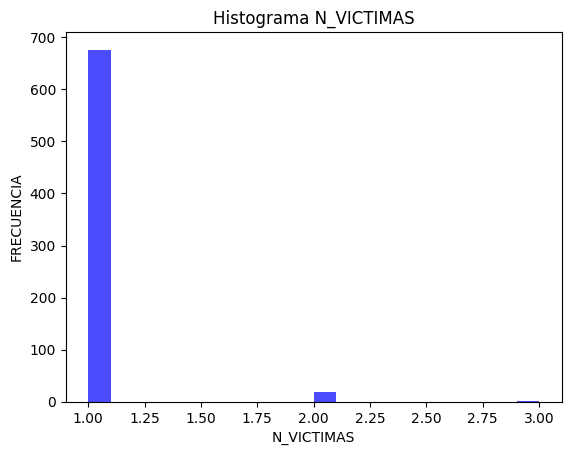

In [24]:
import matplotlib.pyplot as plt

#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable 
# "N_VICTIMAS" ya que es una variable cuantitativa 

plt.hist(Hechos['N_VICTIMAS'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma N_VICTIMAS')
plt.xlabel('N_VICTIMAS')
plt.ylabel('FRECUENCIA')
plt.show()


Podemos observar que la mayoría de los siniestros tienen un único número de víctimas, mientras que en un porcentaje mucho menor se registran dos víctimas

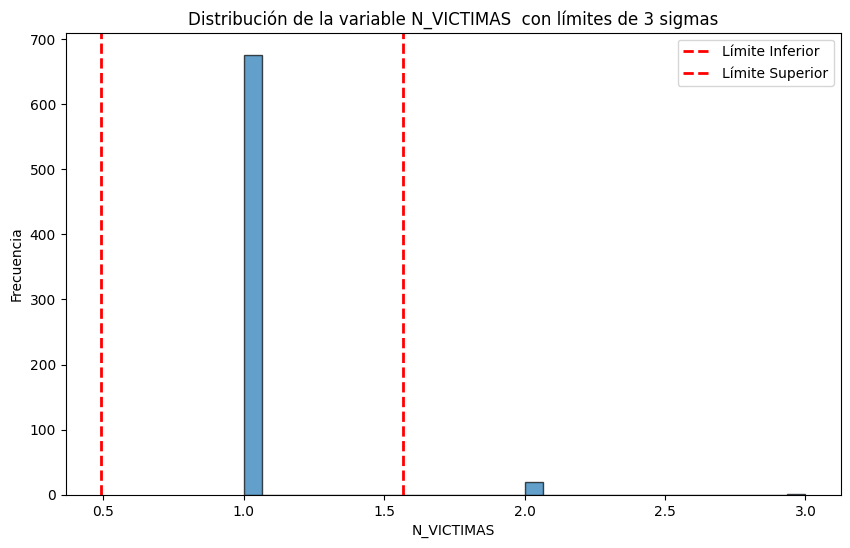

In [25]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar de "N_VICTIMAS" que nos representan numero N_VICTIMAS por siniestro 
# Establecer límites para identificar valores atípicos

media_hh = Hechos['N_VICTIMAS'].mean()
std_hh = Hechos['N_VICTIMAS'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Hechos[(Hechos['N_VICTIMAS'] < limite_inferior) | (Hechos['N_VICTIMAS'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Hechos['N_VICTIMAS'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable N_VICTIMAS  con límites de 3 sigmas')
plt.xlabel('N_VICTIMAS')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


Identificamos valores atípicos durante la exploración de los datos, y procedemos a eliminarlos en el siguiente bloque de código. 

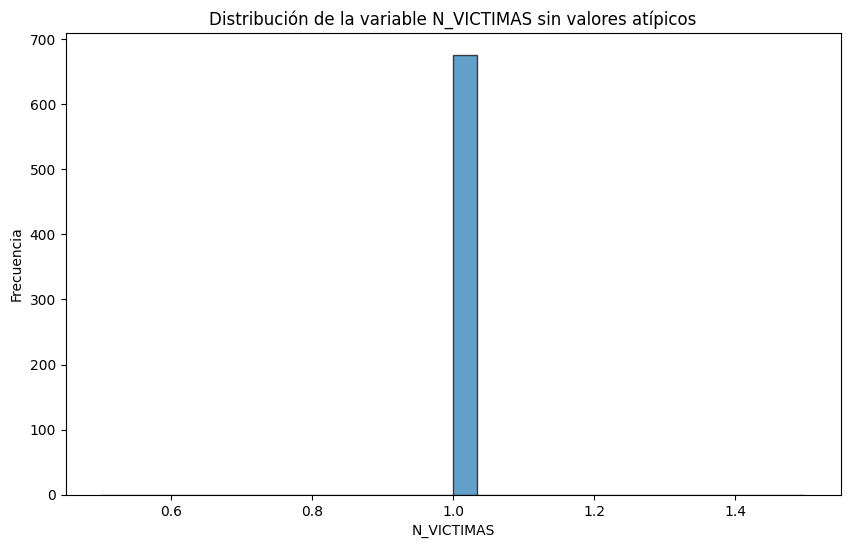

In [26]:
# Eliminar valores atípicos
Hechos_sin_atipicos = Hechos[(Hechos['N_VICTIMAS'] >= limite_inferior) & (Hechos['N_VICTIMAS'] <= limite_superior)]

# Graficar la nueva distribución sin valores atípicos
plt.figure(figsize=(10, 6))
plt.hist(Hechos_sin_atipicos['N_VICTIMAS'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable N_VICTIMAS sin valores atípicos')
plt.xlabel('N_VICTIMAS')
plt.ylabel('Frecuencia')
plt.show()


Confirmamos  la eliminacion de valores atipicos 

C:\Users\Cesar\AppData\Local\Temp\ipykernel_12960\849358561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='COMUNA', data=Hechos, palette='pastel')


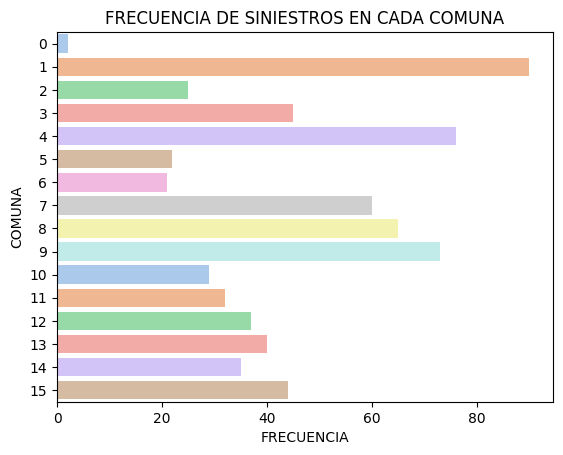

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# En este bloque de código creamos un gráfico de barras horizontales 
# para determinar las categorías más relevantes de la variable cualitativa "COMUNA"
sns.countplot(y='COMUNA', data=Hechos, palette='pastel')
plt.title('FRECUENCIA DE SINIESTROS EN CADA COMUNA')
plt.xlabel('FRECUENCIA')
plt.ylabel('COMUNA')
plt.show()


Observamos en el gráfico de "COMUNA" que algunas comunas tienen muchos registros de siniestros. Esto es crucial para análisis posteriores, ya que estas comunas desempeñarán un papel importante en la resolución de la problemática de los siniestros. Destacamos especialmente las comunas 1, 4, 7, 8 y 9, que muestran una alta incidencia en el problema. Sin embargo, también notamos la presencia de algunas comunas con una incidencia menor, como por ejemplo, la comuna 0, que podría ser un valor atípico o un error en la entrada de datos, así como las comunas 6, 5 y 2. En el siguiente bloque de código, procederemos a eliminar estas últimas comunas con el objetivo de reducir las categorías y facilitar el análisis.

In [28]:
# Calcula la frecuencia de cada categoría "COMUNA"
frecuencia_comuna = Hechos['COMUNA'].value_counts()

# Filtra las filas donde la frecuencia es mayor a 25
categorias_comuna = frecuencia_comuna[frecuencia_comuna> 25].index

# Aplica el filtro al DataFrame original
Hechos = Hechos[Hechos['COMUNA'].isin(categorias_comuna)]


In [29]:
Hechos["COMUNA"].value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
0      0
2      0
5      0
6      0
Name: count, dtype: int64

In [30]:
# Contamos los cuantas veses aparece cada categoria en la variable "PARTICIPANTES"
Hechos["PARTICIPANTES"].value_counts()

PARTICIPANTES
PEATON-PASAJEROS       92
MOTO-AUTO              76
MOTO-CARGAS            70
PEATON-AUTO            67
MOTO-PASAJEROS         42
MOTO-OBJETO FIJO       39
PEATON-CARGAS          32
AUTO-AUTO              29
PEATON-MOTO            25
MOTO-MOTO              24
AUTO-OBJETO FIJO       18
MULTIPLE               15
AUTO-CARGAS            14
BICICLETA-CARGAS       10
MOTO-SD                 9
AUTO-PASAJEROS          9
BICICLETA-AUTO          7
BICICLETA-PASAJEROS     6
PEATON-BICICLETA        5
AUTO-SD                 4
SD-SD                   4
CARGAS-CARGAS           4
PEATON-SD               3
PASAJEROS-PASAJEROS     3
MOTO-OTRO               2
SD-AUTO                 2
PEATON_MOTO-MOTO        1
SD-CARGAS               1
SD-MOTO                 1
AUTO-MOVIL              1
BICICLETA-OTRO          1
PASAJEROS-SD            1
PASAJEROS-AUTO          1
MOVIL-PASAJEROS         1
MOTO-MOVIL              1
MOTO-BICICLETA          1
CARGAS-PASAJEROS        1
CARGAS-OBJETO FIJO      

C:\Users\Cesar\AppData\Local\Temp\ipykernel_12960\2993786973.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='PARTICIPANTES', data=Hechos, palette='pastel')


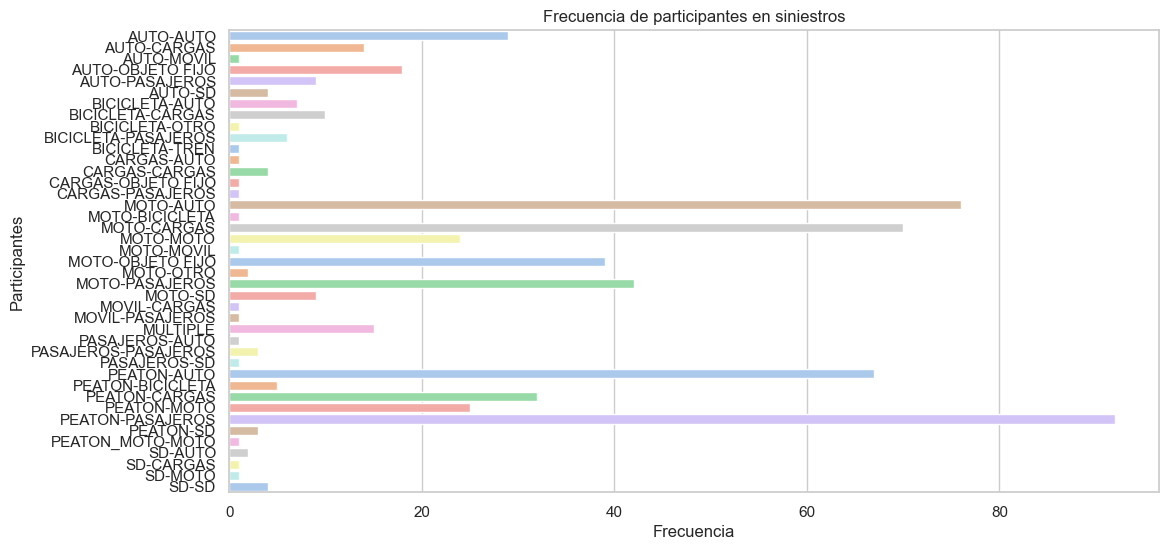

In [31]:
# visulizamos cada categoria para eliminat las menos representativas 
# Configuración para mejorar la visualización del gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal para la columna "PARTICIPANTES"
sns.countplot(y='PARTICIPANTES', data=Hechos, palette='pastel')

# Añadir etiquetas y título al gráfico
plt.title('Frecuencia de participantes en siniestros')
plt.xlabel('Frecuencia')
plt.ylabel('Participantes')

# Mostrar el gráfico
plt.show()


Después de analizar el gráfico, podemos concluir que las categorías con frecuencias menores a 20 no son representativas y no aportan significativamente a la resolución o análisis del problema. Por lo tanto, se tomará la decisión de eliminar las categorías que tengan una frecuencia menor a 20 en la variable analizada.

In [32]:
# Calcula la frecuencia de cada categoría "PARTICIPANTES"
frecuencia_participantes = Hechos['PARTICIPANTES'].value_counts()

# Filtra las filas donde la frecuencia es mayor a 25
categorias_participantes = frecuencia_participantes[frecuencia_participantes> 20].index

# Aplica el filtro al DataFrame original
Hechos = Hechos[Hechos['PARTICIPANTES'].isin(categorias_participantes)]


In [33]:
# se cuenta cuantas veses aparece cada categoria en "PARTICIPANTES"
Hechos["PARTICIPANTES"].value_counts()

PARTICIPANTES
PEATON-PASAJEROS       92
MOTO-AUTO              76
MOTO-CARGAS            70
PEATON-AUTO            67
MOTO-PASAJEROS         42
MOTO-OBJETO FIJO       39
PEATON-CARGAS          32
AUTO-AUTO              29
PEATON-MOTO            25
MOTO-MOTO              24
AUTO-OBJETO FIJO        0
PASAJEROS-AUTO          0
PASAJEROS-PASAJEROS     0
PASAJEROS-SD            0
AUTO-PASAJEROS          0
PEATON-BICICLETA        0
BICICLETA-OTRO          0
MOVIL-PASAJEROS         0
AUTO-MOVIL              0
PEATON-SD               0
PEATON_MOTO-MOTO        0
SD-AUTO                 0
SD-CARGAS               0
SD-MOTO                 0
MULTIPLE                0
MOVIL-CARGAS            0
BICICLETA-PASAJEROS     0
MOTO-SD                 0
AUTO-SD                 0
MOTO-OTRO               0
AUTO-CARGAS             0
MOTO-MOVIL              0
BICICLETA-AUTO          0
MOTO-BICICLETA          0
BICICLETA-CARGAS        0
CARGAS-PASAJEROS        0
CARGAS-OBJETO FIJO      0
CARGAS-CARGAS           

C:\Users\Cesar\AppData\Local\Temp\ipykernel_12960\1350431005.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VICTIMA', data=Hechos, palette='pastel')


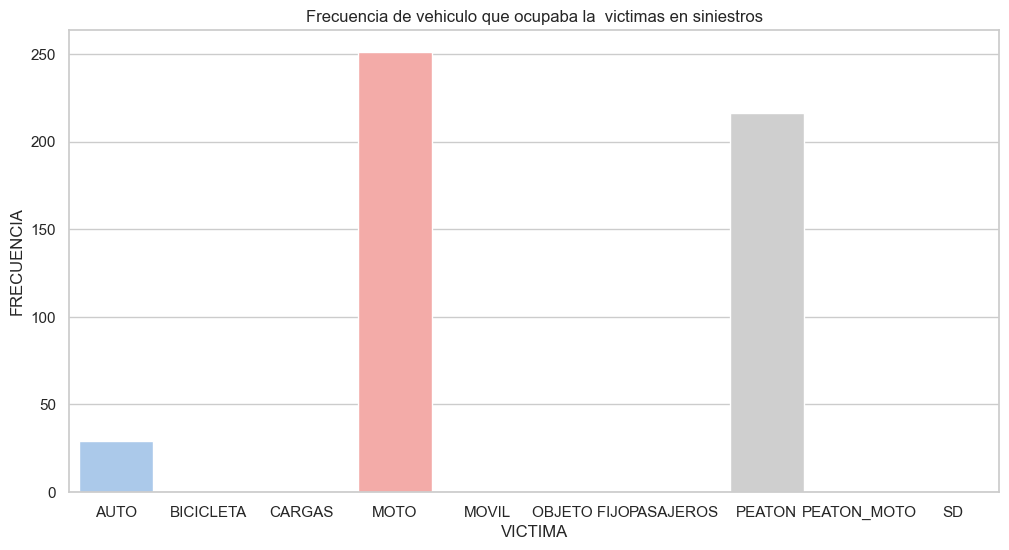

In [34]:
# visulizamos cada categoria para eliminat las menos representativas 
# Configuración para mejorar la visualización del gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal para la columna "PARTICIPANTES"
sns.countplot(x='VICTIMA', data=Hechos, palette='pastel')

# Añadir etiquetas y título al gráfico
plt.title('Frecuencia de vehiculo que ocupaba la  victimas en siniestros')
plt.xlabel('VICTIMA')
plt.ylabel('FRECUENCIA')

# Mostrar el gráfico
plt.show()



Hemos identificado que algunas categorías no influyen significativamente en la resolución del problema. Con el propósito de simplificar nuestro análisis, contaremos la frecuencia de cada categoría y eliminaremos aquellas que se repiten menos de 25 veces. Nos centraremos en las categorías más frecuentes, ya que son las que aportarán información más relevante para abordar la problemática en cuestión.

In [35]:
# Calcula la frecuencia de cada categoría "PARTICIPANTES"
frecuencia_victimas = Hechos['VICTIMA'].value_counts()

# Filtra las filas donde la frecuencia es mayor a 25
categorias_victimas = frecuencia_victimas[frecuencia_victimas> 27].index

# Aplica el filtro al DataFrame original
Hechos = Hechos[Hechos['VICTIMA'].isin(categorias_victimas)]


In [36]:
# Se cuenta cauntas veses aparece cada categoria en "VICTIMA"
Hechos["VICTIMA"].value_counts()

VICTIMA
MOTO           251
PEATON         216
AUTO            29
BICICLETA        0
CARGAS           0
MOVIL            0
OBJETO FIJO      0
PASAJEROS        0
PEATON_MOTO      0
SD               0
Name: count, dtype: int64

C:\Users\Cesar\AppData\Local\Temp\ipykernel_12960\268588906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ACUSADO', data=Hechos, palette='pastel')


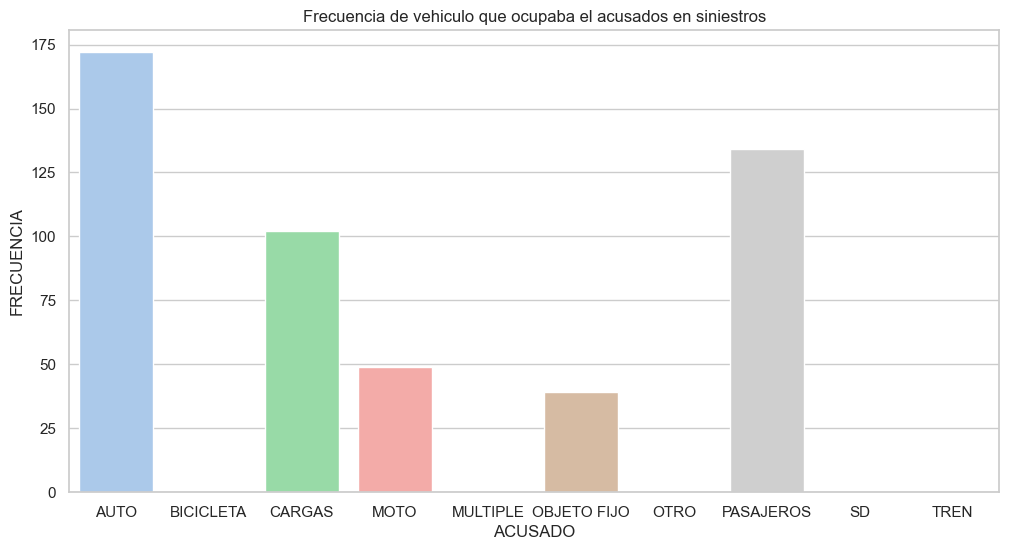

In [37]:
# visulizamos cada categoria para eliminat las menos representativas 
# Configuración para mejorar la visualización del gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal para la columna "PARTICIPANTES"
sns.countplot(x='ACUSADO', data=Hechos, palette='pastel')

# Añadir etiquetas y título al gráfico
plt.title('Frecuencia de vehiculo que ocupaba el acusados en siniestros')
plt.xlabel('ACUSADO')
plt.ylabel('FRECUENCIA')

# Mostrar el gráfico
plt.show()



Hemos identificado que algunas categorías no influyen significativamente en la resolución del problema. Con el propósito de simplificar nuestro análisis, contaremos la frecuencia de cada categoría y eliminaremos aquellas que se repiten menos de 50 veces. Nos centraremos en las categorías más frecuentes, ya que son las que aportarán información más relevante para abordar la problemática en cuestión.

In [38]:
# Calcula la frecuencia de cada categoría "PARTICIPANTES"
frecuencia_acusado = Hechos['ACUSADO'].value_counts()

# Filtra las filas donde la frecuencia es mayor a 25
categorias_acusado = frecuencia_acusado[frecuencia_acusado> 27].index

# Aplica el filtro al DataFrame original
Hechos = Hechos[Hechos['ACUSADO'].isin(categorias_acusado)]


In [39]:
# Se cuenta cauntas veses aparece cada categoria en "VICTIMA"

Hechos["ACUSADO"].value_counts()

ACUSADO
AUTO           172
PASAJEROS      134
CARGAS         102
MOTO            49
OBJETO FIJO     39
BICICLETA        0
MULTIPLE         0
OTRO             0
SD               0
TREN             0
Name: count, dtype: int64

In [40]:
Hechos.to_csv('Hechos.csv', index=False)

In [43]:
Hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 693
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID_hecho               496 non-null    object  
 1   N_VICTIMAS             496 non-null    int64   
 2   FECHA                  496 non-null    object  
 3   AAAA                   496 non-null    int64   
 4   MM                     496 non-null    int64   
 5   DD                     496 non-null    int64   
 6   HORA                   496 non-null    object  
 7   HH                     496 non-null    int32   
 8   LUGAR_DEL_HECHO        496 non-null    object  
 9   TIPO_DE_CALLE          496 non-null    category
 10  Calle                  496 non-null    object  
 11  Cruce                  496 non-null    object  
 12  Dirección Normalizada  496 non-null    object  
 13  COMUNA                 496 non-null    category
 14  XY (CABA)              496 non-null    object  

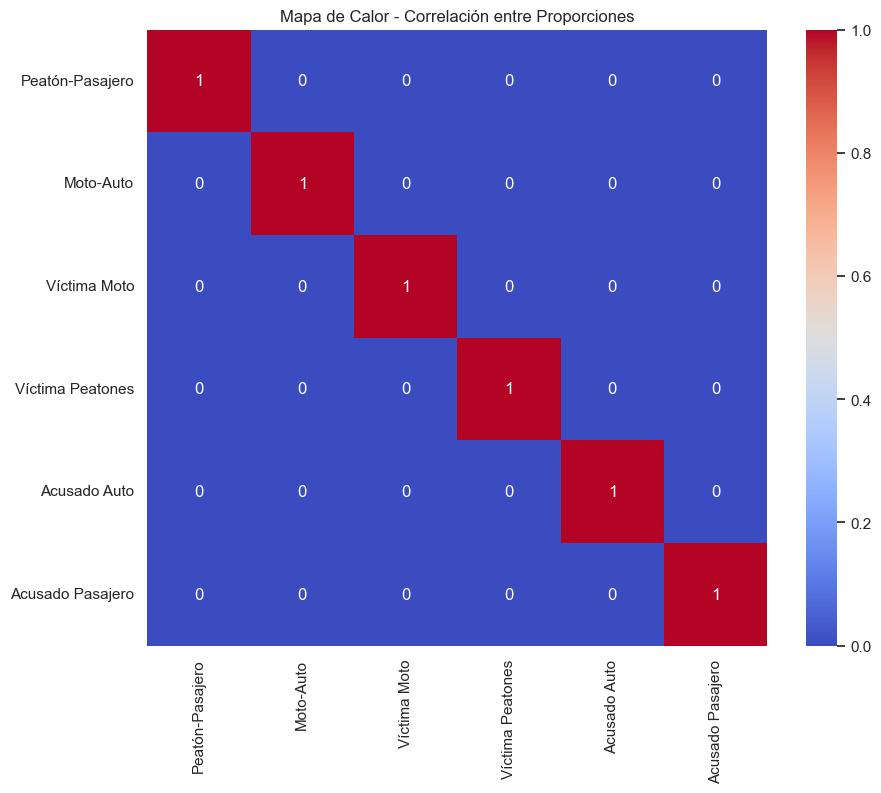

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Se crean las siguientes proporciones de las variables categoricas con las frecuencias mas representativas 
# dividido el total de los siniestros para sacar proporciones 
# 18.55% Proporcion peaton-pasajero
# 15.32% Proporcion Moto - auto 
# 50.60% victima moto 
# 43.55% victima peatones  
# 34.68% acusado auto
# 27.02% acusado pasajero 


prop_peaton_pasajero = 18.55
prop_moto_auto = 15.32
prop_victima_moto = 50.60
prop_victima_peatones = 43.55
prop_acusado_auto = 34.68
prop_acusado_pasajero = 27.02

# Crear una matriz de correlación
matriz_correlacion = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
                               [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
                               [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                               [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

# Etiquetas
etiquetas = ['Peatón-Pasajero', 'Moto-Auto', 'Víctima Moto', 'Víctima Peatones', 'Acusado Auto', 'Acusado Pasajero']

# Crear un mapa de calor
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Mapa de Calor - Correlación entre Proporciones')
plt.show()


podemos observar que hay una correlacion perfecta positiva lo cual nos indica que hay redundacia por este motivo solo nos quadamos con las clases 18.55% Proporcion peaton-pasajero 15.32%  Proporcion Moto - auto para la resolucion del problema planteado 